In [36]:
import os
import pandas as pd
from json import loads,dumps
from collections import Counter
import re
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Checking for common ids 

In [37]:
p1_path = ""

zeroshot_df = pd.read_csv(p1_path + 'pipeline1_zeroshot_12_2444_optimized_prompt.csv')
dynamic_fewshot_df = pd.read_csv(p1_path + 'pipeline1_optimizedFewShotWith2AppAnd2InappExamples_2306.csv')





In [38]:
all_dfs = {
    "zeroshot":zeroshot_df,
    "dynamic fewshot":dynamic_fewshot_df
}

In [39]:
for k,v in all_dfs.items():
    print(k,"shape:",v.shape)

zeroshot shape: (2444, 6)
dynamic fewshot shape: (2306, 6)


In [40]:
## check for duplicates in any dfs
for name, df in all_dfs.items():
    df_unique = df.drop_duplicates(subset=['Video Id'])
    print(name,df_unique.shape)

zeroshot (2444, 6)
dynamic fewshot (2306, 6)


## Finding common ids

In [41]:

dataframes = list(all_dfs.values())
common_video_ids = set(dataframes[0]['Video Id'])

for df in dataframes[1:]:
    common_video_ids &= set(df['Video Id'])

In [42]:
len(common_video_ids)

2266

## Stats

------------ zeroshot -----------------
Accuracy: 0.8978134761267291
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1897
           1       0.61      0.90      0.73       344

    accuracy                           0.90      2241
   macro avg       0.80      0.90      0.83      2241
weighted avg       0.92      0.90      0.91      2241



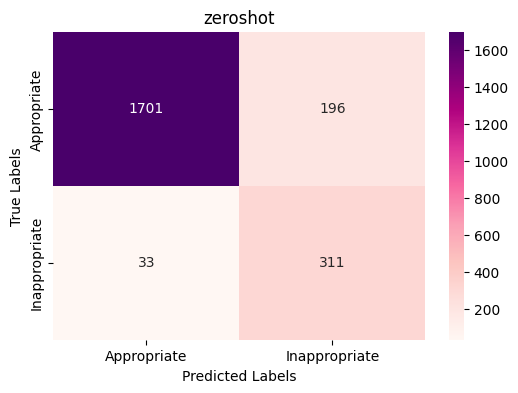


 
 --------------------------------
------------ dynamic fewshot -----------------
Accuracy: 0.8987059348505132
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1895
           1       0.61      0.93      0.74       346

    accuracy                           0.90      2241
   macro avg       0.80      0.91      0.84      2241
weighted avg       0.93      0.90      0.91      2241



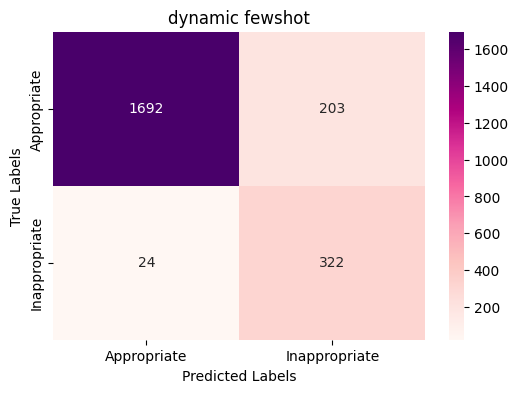


 
 --------------------------------


In [43]:
for name,df in all_dfs.items():
    print("------------",name,"-----------------")
    
    filtered_df = df[df['Primary Label'].isin(['inappropriate', 'child directed', 'irrelevant'])]
    filtered_df2 = filtered_df[filtered_df['Video Id'].isin(common_video_ids)]
    
    predicted_labels = list(filtered_df2['Predicted Label'])
    ground_truths = list(filtered_df2['Primary Label'])
    
    preds = [1 if pred == 'inappropriate' else 0 for pred in predicted_labels] 
    grounds = [1 if label == 'inappropriate' else 0 for label in ground_truths] 
    
    print("Accuracy:",accuracy_score(grounds,preds))
    
    
    report = classification_report(grounds, preds) 
    print(report) 


    cm = confusion_matrix(grounds, preds)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu',xticklabels=['Appropriate', 'Inappropriate'], yticklabels=['Appropriate', 'Inappropriate'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(name)
    plt.show()
    print("\n \n --------------------------------")

Accuracy: 0.8987059348505132
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1895
           1       0.61      0.93      0.74       346

    accuracy                           0.90      2241
   macro avg       0.80      0.91      0.84      2241
weighted avg       0.93      0.90      0.91      2241



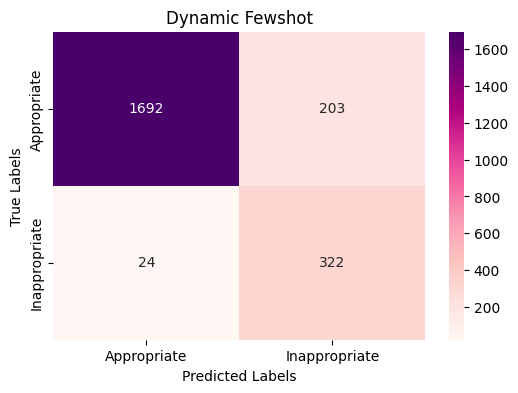

In [44]:

filtered_df = dynamic_fewshot_df[dynamic_fewshot_df['Primary Label'].isin(['inappropriate', 'child directed', 'irrelevant'])]
filtered_df2 = filtered_df[filtered_df['Video Id'].isin(common_video_ids)]

predicted_labels = list(filtered_df2['Predicted Label'])
ground_truths = list(filtered_df2['Primary Label'])

preds = [1 if pred == 'inappropriate' else 0 for pred in predicted_labels] 
grounds = [1 if label == 'inappropriate' else 0 for label in ground_truths] 

print("Accuracy:",accuracy_score(grounds,preds))


report = classification_report(grounds, preds) 
print(report) 


cm = confusion_matrix(grounds, preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu',xticklabels=['Appropriate', 'Inappropriate'], yticklabels=['Appropriate', 'Inappropriate'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Dynamic Fewshot')
plt.show()

Accuracy: 0.8978134761267291
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1897
           1       0.61      0.90      0.73       344

    accuracy                           0.90      2241
   macro avg       0.80      0.90      0.83      2241
weighted avg       0.92      0.90      0.91      2241



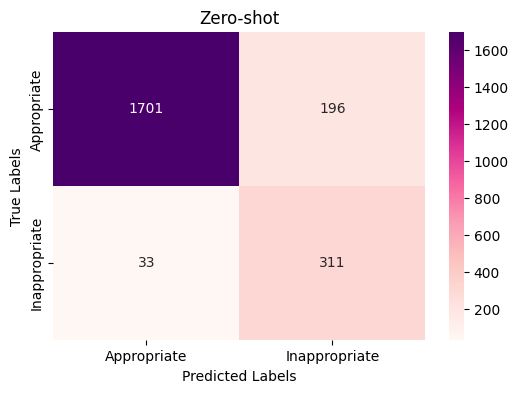

In [45]:

filtered_df = zeroshot_df[zeroshot_df['Primary Label'].isin(['inappropriate', 'child directed', 'irrelevant'])]
filtered_df2 = filtered_df[filtered_df['Video Id'].isin(common_video_ids)]

predicted_labels = list(filtered_df2['Predicted Label'])
ground_truths = list(filtered_df2['Primary Label'])

preds = [1 if pred == 'inappropriate' else 0 for pred in predicted_labels] 
grounds = [1 if label == 'inappropriate' else 0 for label in ground_truths] 

print("Accuracy:",accuracy_score(grounds,preds))


report = classification_report(grounds, preds) 
print(report) 

cm = confusion_matrix(grounds, preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu',xticklabels=['Appropriate', 'Inappropriate'], yticklabels=['Appropriate', 'Inappropriate'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Zero-shot')
plt.show()